/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


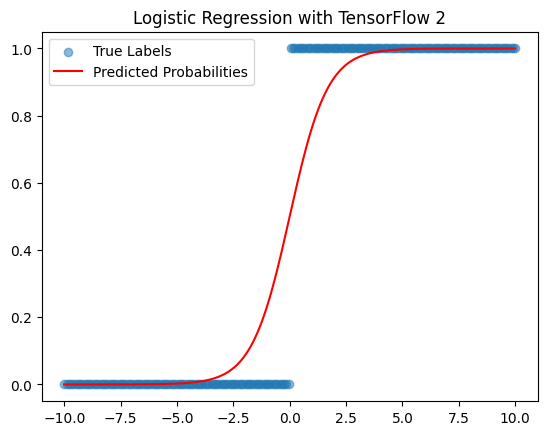

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic binary classification data
X = np.linspace(-10, 10, 200).reshape(-1, 1)                  # 200 points between -10 and 10
y = (1 / (1 + np.exp(-0.8 * X))).reshape(-1) > 0.5           # Sigmoid function + threshold at 0.5
y = y.astype(np.float32)                                     # Convert boolean to float (0 or 1)

# Create a logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=[1])  # 1 neuron with sigmoid activation
])

# Compile the model with binary crossentropy and SGD optimizer
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=100, verbose=0)                        # Train for 100 epochs

# Predict probabilities for the input data
probs = model.predict(X)                                      # Get predicted probabilities
preds = (probs > 0.5).astype(np.float32)                      # Threshold at 0.5 to classify

# Plot the results
plt.scatter(X, y, label='True Labels', alpha=0.5)             # Original data points
plt.plot(X, probs, color='red', label='Predicted Probabilities') # Predicted sigmoid curve
plt.title("Logistic Regression with TensorFlow 2")
plt.legend()
plt.show()